# Convolution

## 기본 개념

#### Pooling

- 차원을 줄이는 것 -> 필요한 데이터 적어짐, 빠른 연산
- 차원이 늘수록 필요한 데이터가 많아짐.
- 전제 조건 : 특징(성격)이 변하면 안된다.
- 영상 데이터는 크면 클수록 흰색에 가깝다. -> 큰 값이 중요
- 큰 값을 가진 feature를 뽑음 (max-pooling)

### 차원 축소

- 데이터를 늘리거나 차원을 줄여야 overfitting 안생김.
- **ML**
    - feature selection
        - filter : 통계값으로 중요성 파악(chi square 등으로)
        - wrapper : 알고리즘을 감싼다. 모델 기준으로 하나씩 지웠을 때 성능 가장 좋은 feature 조합
        - embeded : 알고리즘 자체에서 feature를 뽑아냄
- **DL**
    - Dropout

<AxesSubplot:>

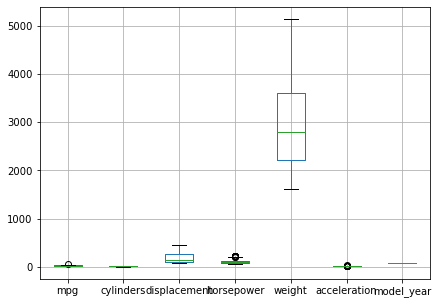

In [2]:
import seaborn as sns
mpg = sns.load_dataset('mpg')
mpg.boxplot(figsize=(7,5))

In [4]:
iris = sns.load_dataset('iris')
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [5]:
rf.fit(iris.iloc[:,:-1], iris.species)

RandomForestClassifier()

In [6]:
vars(rf)

{'base_estimator': DecisionTreeClassifier(),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'min_impurity_split',
  'random_state',
  'ccp_alpha'),
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'ccp_alpha': 0.0,
 'n_features_in_': 4,
 'n_features_': 4,
 'n_outputs_': 1,
 'classes_': array(['setosa', 'versicolor', 'virginica'], dtype=object),
 'n_classes_': 3,
 'base_estimator_': DecisionTreeClassifier(),
 'estimators_': [DecisionTreeClassifier(max_features='auto', random_stat

In [7]:
rf.feature_importances_

array([0.12050712, 0.02574401, 0.40872747, 0.4450214 ])

#### filter

In [8]:
from sklearn.feature_selection import chi2, SelectKBest
skb = SelectKBest(chi2, k=3)
skb.fit(iris.iloc[:,:-1], iris.species)

SelectKBest(k=3, score_func=<function chi2 at 0x000001B2A59A80D0>)

In [10]:
# skb.fit_transform(iris.iloc[:,:-1], iris.species)

#### wrapper

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe = RFE(LogisticRegression(), n_features_to_select=3)
# rfe.fit_transform(iris.iloc[:,:-1], iris.species)

# Recursive Feature Elemination(RFE)

#### embeded

In [13]:
lr = LogisticRegression()
lr.fit(iris.iloc[:,:-1], iris.species)

C:\Users\Gyu\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [20]:
import numpy as np
lr.decision_function(np.array([[4.5,1.5,2.5,5.8]]))

array([[-3.1841287 , -1.86832958,  5.05245828]])

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
# pca.fit_transform(ris.iloc[:,:-1], iris.species)

# 값이 바뀌어서 원래의 의미를 잃어버림.

#### strides
- 다음 window가 어디로 갈 것인가

**pooling과 stride로 dimension reduction 효과를 낼 수 있다**

In [21]:
from skimage import data
from skimage.util import view_as_blocks, view_as_windows
camera = data.camera()

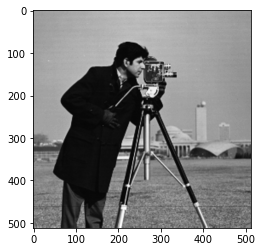

In [22]:
import matplotlib.pyplot as plt
plt.imshow(camera, cmap='gray')

- view_as_blocks : 겹치지 않게 조각냄
- view_as_window : 겹치게

In [27]:
view = view_as_blocks(camera,(4,4))  # (5,5)하면 에러남
view.shape  
# 4,4 가 128씩 있다.

(128, 128, 4, 4)

In [28]:
flatten_view = view.reshape(view.shape[0],view.shape[1],-1)

- fitter 한다 -> 곱해서 새로운 값 나오는 것 
- channel값이 있어야 fitter 계산 가능

In [29]:
flatten_view.shape

(128, 128, 16)

In [31]:
x= np.arange(24).reshape(2,3,4)
x.max(axis=0)

array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

(2,3,4) 에서 axis=0 이면 (3,4)만 생각

In [32]:
x.max(axis=2)

array([[ 3,  7, 11],
       [15, 19, 23]])

In [33]:
x.sum(axis=0)

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 30, 32, 34]])

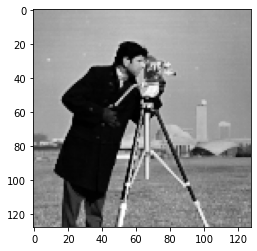

In [38]:
view_max = np.max(flatten_view, axis=2)
plt.imshow(view_max,cmap = 'gray')

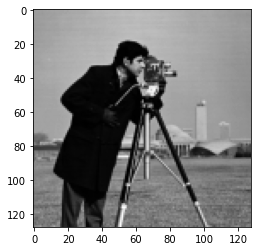

In [44]:
view_mean = np.mean(flatten_view, axis=2)
plt.imshow(view_mean,cmap = 'gray')

In [48]:
view_average = np.average(flatten_view, axis=2)

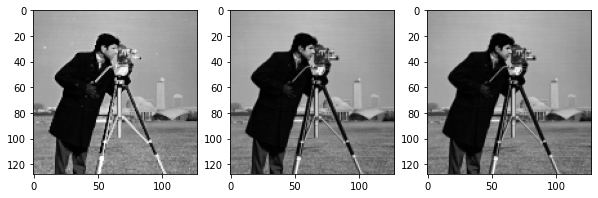

In [49]:
fig, ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(view_max, cmap='gray')
# local maxpooling
ax[1].imshow(view_mean, cmap='gray')
# local averagepooling
ax[2].imshow(view_average, cmap='gray')
# local averagepooling

- localpooling
- globalpooling : 각 이미지를 하나로(1차원) <-> flatten

In [51]:
patch = view_as_windows(camera,(4,4))
patch_view = patch.reshape(patch.shape[0],patch.shape[1],-1)
patch_view.shape

(509, 509, 16)

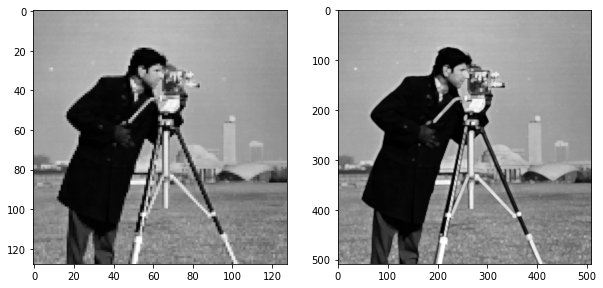

In [53]:
max_view = np.max(patch_view, axis=2)
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(view_max, cmap='gray')
ax[1].imshow(max_view, cmap='gray')

- blob 방식보다 window 방식을 쓴다.

- vectorization을 동시에 하는거 ->  gpu